In [11]:
# load and summarize the dataset
from pandas import read_csv
import pandas as pd

dataset = read_csv(r"C:\Users\jonat\Downloads\diabetes.csv") # load the dataset
print(dataset.describe()) # summarize the dataset

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [13]:
# manually impute missing values with numpy
dataset.fillna(dataset.mean(), inplace=True) # fill missing values with mean column values
print(dataset.isnull().sum()) # count the number of NaN values in each column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
X = dataset.drop(['Outcome'],axis=1)
y = dataset['Outcome']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.266234   0.21241969 0.12509523 0.11113316 0.09723747 0.08414672
 0.05529564 0.04843809]


In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=25)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res
#Now the Dataset is Balanced

array([[-0.53224752,  0.52159731,  0.01405558, ...,  0.13290918,
         0.10751639, -0.63534288],
       [ 0.40634089, -1.37240421, -0.15446998, ..., -0.11464925,
        -0.20637241, -0.15237076],
       [ 0.8288658 , -0.44795314,  0.45658754, ...,  0.54148178,
        -0.61462522,  0.48636606],
       ...,
       [ 0.36553935,  0.20032868,  2.79048591, ...,  0.62602982,
         0.43732536, -0.93148916],
       [-0.18821146,  0.45351093,  0.79218444, ...,  0.62396054,
         0.43757666,  0.82743388],
       [-0.51248156,  0.08719948, -0.873256  , ...,  0.53529999,
        -0.48024229, -0.07778219]])

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[144  62]
 [ 19  83]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       206
           1       0.57      0.81      0.67       102

    accuracy                           0.74       308
   macro avg       0.73      0.76      0.73       308
weighted avg       0.78      0.74      0.74       308



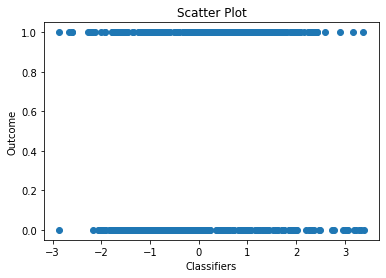

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X_res[:,1], y_res)
plt.title("Scatter Plot")
plt.xlabel('Classifiers')
plt.ylabel('Outcome')
plt.show()